In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from utils import spatial_plot
from sklearn.metrics import mean_absolute_error, r2_score, max_error
from scipy import stats
import dataframe_image as dfi

In [2]:
df = pd.read_pickle('results.pkl')
df['KNeighborsRegressor()'] = df.apply(lambda row: row['KNeighborsRegressor()'][0], axis=1)
df.rename(columns={'KNeighborsRegressor()': 'KNN', 'RandomForestRegressor()': 'RF', 'SVR()': 'SVR','GradientBoostingRegressor()': 'Boosting','MLPRegressor()': 'MLP'}, inplace=True)

In [3]:
df.head()

,pdda,true_phi,x_loc,y_loc,KNN,RF,SVR,SVR(kernel='poly'),Boosting,MLP
0,23,38.4,44.1,44.9,24.00,24.564,24.887195,19.693958,27.744632,25.806101
1,80,38.4,44.1,44.9,37.66,25.879,23.327846,19.933391,26.053819,28.636405
2,60,38.4,44.1,44.9,32.12,31.573,25.109042,19.452195,26.756456,29.099620
3,53,34.3,44.1,45.9,36.38,35.072,33.916513,20.954406,35.769602,38.648749
4,41,34.3,44.1,45.9,38.52,37.625,41.878026,22.142247,39.592802,42.796827


In [4]:
sns.set_theme(style="whitegrid")

In [5]:
cols = ['true_phi','pdda','KNN', 'SVR','RF', 'Boosting', 'MLP']

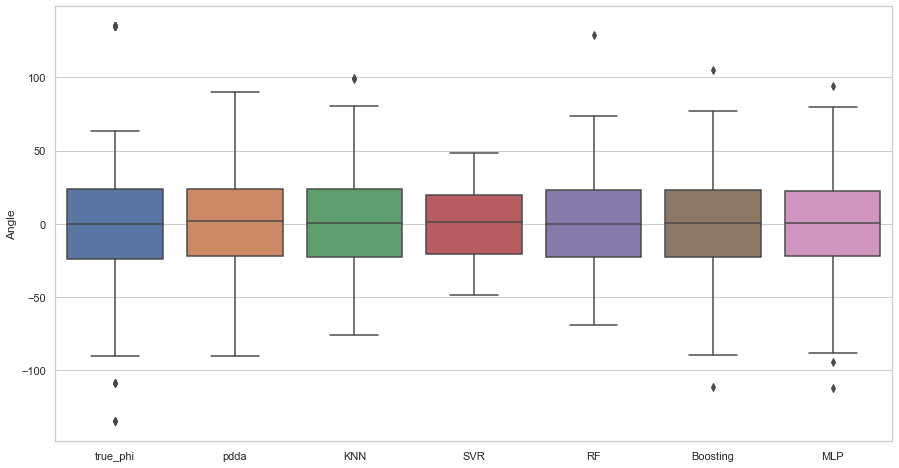

In [6]:
plt.figure(figsize=(15,8))
df["MAE"] = df.apply(lambda row: mean_absolute_error([row['pdda']], [row['true_phi']]), axis=1) 
ax = sns.boxplot(data=df[cols])
ax.set(ylabel='Angle')
plt.savefig('models_boxplot.png')

C:\Users\nini\Desktop\Libra\sensors-positioning\utils.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list(range(-2,15,2)))
C:\Users\nini\Desktop\Libra\sensors-positioning\utils.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(list(range(0,8)))


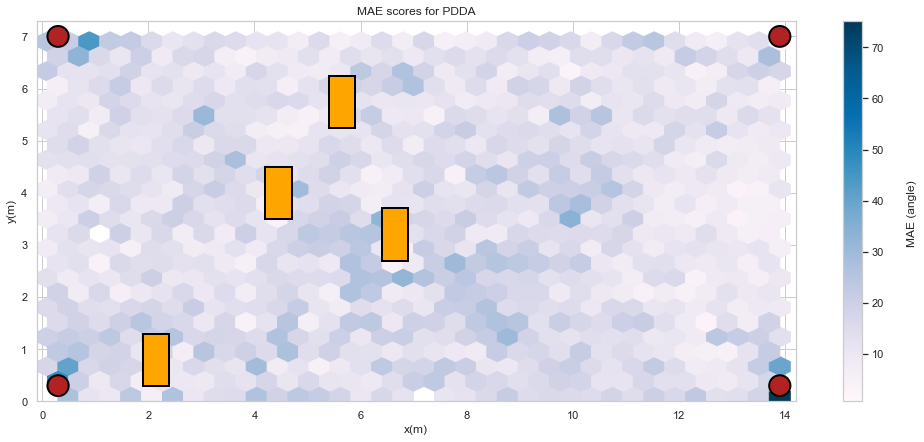

In [7]:
df["MAE"] = df.apply(lambda row: mean_absolute_error([row['pdda']], [row['true_phi']]), axis=1) 

spatial_plot(df['MAE'], df['x_loc'], df['y_loc'], 'pdda_room.png', 'MAE scores for PDDA')
# plt.savefig('pdda_room.png')

C:\Users\nini\Desktop\Libra\sensors-positioning\utils.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list(range(-2,15,2)))
C:\Users\nini\Desktop\Libra\sensors-positioning\utils.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(list(range(0,8)))


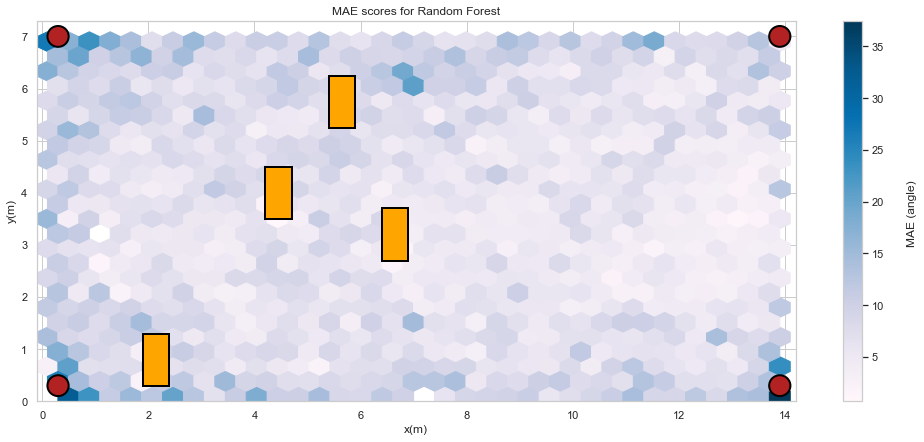

In [8]:
df["MAE"] = df.apply(lambda row: mean_absolute_error([row['RF']], [row['true_phi']]), axis=1) 
spatial_plot(df['MAE'], df['x_loc'], df['y_loc'], 'rf_room.png', 'MAE scores for Random Forest')

In [9]:
def calculate_metrics(df, metrics):
    # mae, spearman's correlation
    results = {}
    models = ['pdda', 'KNN', 'RF', 'SVR', "SVR(kernel='poly')", 'Boosting', 'MLP']
    for model in models:
        temp = []
        for metric in metrics:
            temp.append(metric(df[model], df['true_phi']))
        results[str(model)] = temp
    results = pd.DataFrame.from_dict(results)
    return results

In [22]:
error_metrics = calculate_metrics(df, [mean_absolute_error,max_error, r2_score,stats.spearmanr])
error_metrics.index = ['MAE', 'Max Error', 'R^2', 'Spearman Coefficient ']

In [23]:
df_styled = error_metrics.style.background_gradient()
dfi.export(df_styled, "mytable.png")

C:\Users\nini\Anaconda3\envs\libra\lib\site-packages\dataframe_image\_pandas_accessor.py:69: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = '<div>' + obj.render() + '</div>'


In [24]:
error_metrics.head()

,pdda,KNN,RF,SVR,SVR(kernel='poly'),Boosting,MLP
MAE,14.327107,7.522976,7.322039,9.695933,15.081425,8.614034,8.613048
Max Error,225.0,169.58,185.902,141.576856,389.447015,172.853604,184.305037
R^2,0.516919,0.778008,0.790947,0.602195,0.20187,0.738716,0.752094
Spearman Coefficient,"(0.7754949331829546, 0.0)","(0.903564116364807, 0.0)","(0.911800083808, 0.0)","(0.8639668018774764, 0.0)","(0.7475218506220679, 0.0)","(0.8930961281132483, 0.0)","(0.8964073935052724, 0.0)"


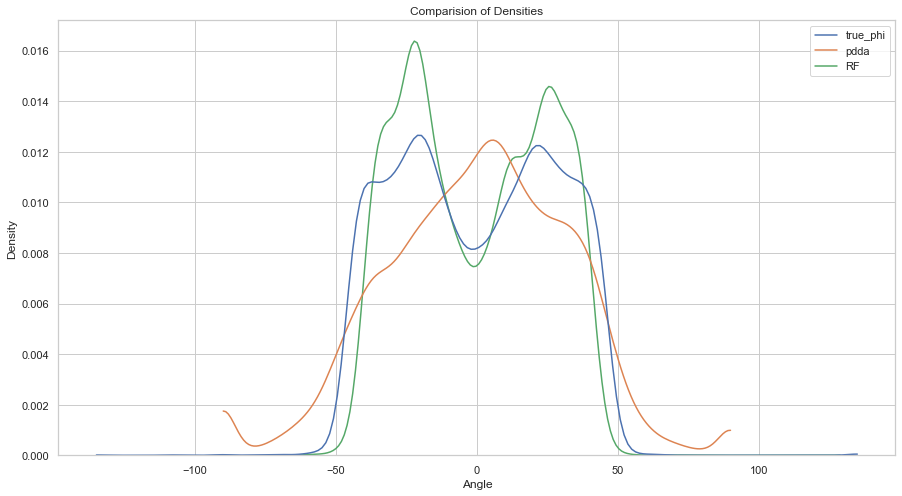

In [31]:
# Set figure size for the notebook
plt.figure(figsize=(15,8))
cols = ['true_phi', 'pdda', 'RF']

# Without transparency
sns.kdeplot(data=df[cols],cut=0, fill=False, common_norm=False, alpha=1)
plt.xlabel('Angle')
plt.title('Comparision of Densities')
plt.savefig('densities.png')
plt.show()